In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Set random seed for reproducibility
np.random.seed(42)

# Try loading Superstore dataset; if not available, create a synthetic subset

df = pd.read_csv(r'C:\Users\ponna\Downloads\archive (10)\Sample - Superstore.csv', encoding='latin1')
# Filter to 1000 rows for small dataset
df = df.sample(n=1000, random_state=42)


# Select relevant columns
df = df[['Region', 'Category', 'Sales', 'Profit', 'Quantity']]

# Basic data cleaning: drop missing values and ensure numeric types
df = df.dropna()
df['Sales'] = df['Sales'].astype(float)
df['Profit'] = df['Profit'].astype(float)
df['Quantity'] = df['Quantity'].astype(int)

# Display first few rows
print("Dataset Preview:")
df.head()

Dataset Preview:


,Region,Category,Sales,Profit,Quantity
3125,South,Office Supplies,563.808,21.1428,4
1441,West,Office Supplies,36.672,11.4600,2
4510,Central,Furniture,37.300,17.1580,2
39,Central,Furniture,212.058,-15.1470,3
4509,West,Furniture,171.288,-6.4233,3


In [5]:
# Summary statistics for numerical columns
summary_stats = df[['Sales', 'Profit', 'Quantity']].describe()
mode_values = df[['Sales', 'Profit', 'Quantity']].mode().iloc[0]
print('Summary Statistics:')
print(summary_stats)
print('\nMode Values:')
print(mode_values)

Summary Statistics:
              Sales       Profit     Quantity
count   1000.000000  1000.000000  1000.000000
mean     255.710514    16.371438     3.844000
std      902.422925   230.002523     2.162022
min        0.836000 -3839.990400     1.000000
25%       16.550000     1.649300     2.000000
50%       50.988000     8.679950     3.000000
75%      197.775000    27.639750     5.000000
max    22638.480000  1995.990000    14.000000

Mode Values:
Sales       12.96
Profit       0.00
Quantity     2.00
Name: 0, dtype: float64


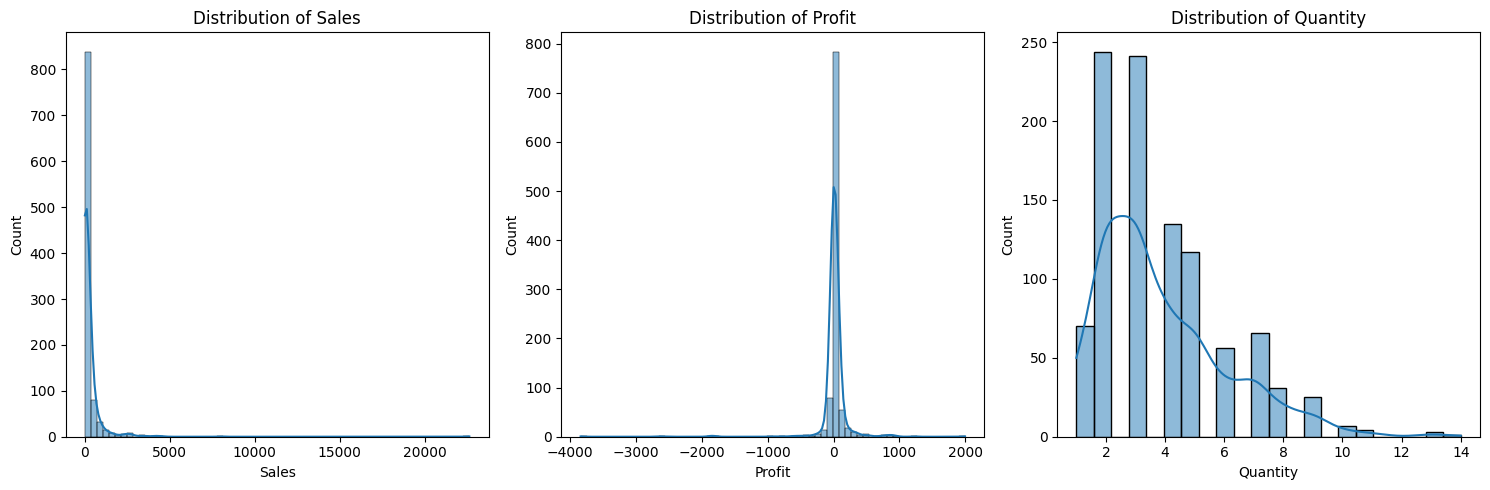

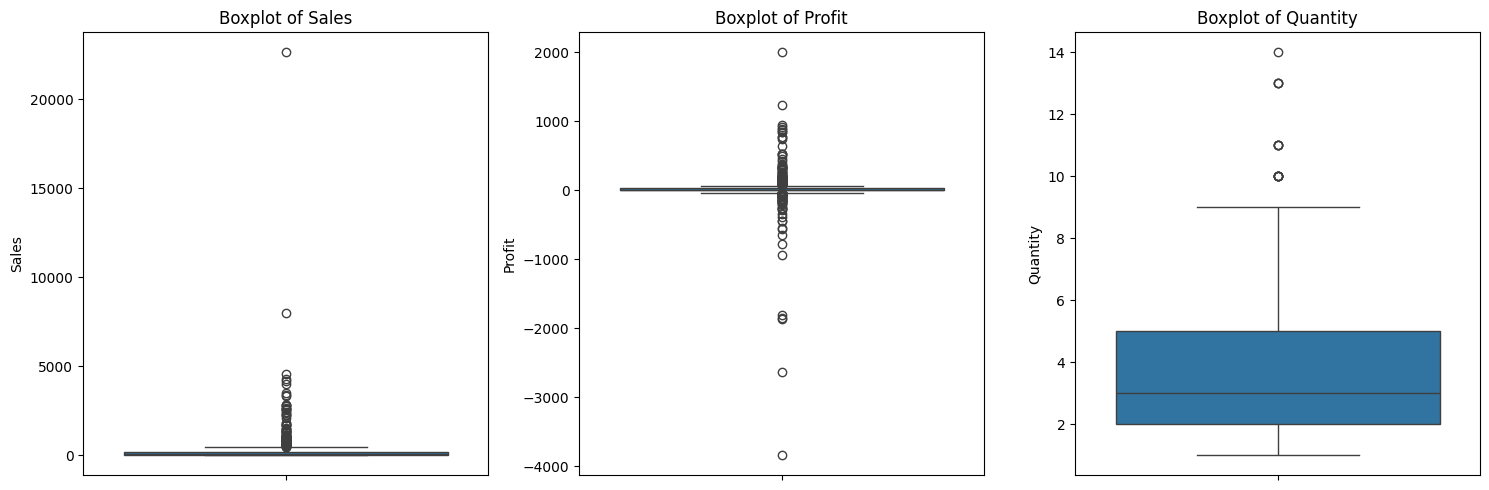

In [6]:
# Histograms
plt.figure(figsize=(15, 5))
for i, col in enumerate(['Sales', 'Profit', 'Quantity'], 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Boxplots
plt.figure(figsize=(15, 5))
for i, col in enumerate(['Sales', 'Profit', 'Quantity'], 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [7]:
# One-sample t-test
# H₀: Mean sales amount is equal to $200
# H₁: Mean sales amount is not equal to $200
t_stat, p_value = stats.ttest_1samp(df['Sales'], 200)
print('One-Sample t-test Results:')
print(f't-statistic: {t_stat:.4f}, p-value: {p_value:.4f}')
print('Interpretation:')
if p_value < 0.05:
    print('Reject H₀: The mean sales amount is significantly different from $200.')
else:
    print('Fail to reject H₀: No significant evidence that the mean sales amount differs from $200.')

One-Sample t-test Results:
t-statistic: 1.9522, p-value: 0.0512
Interpretation:
Fail to reject H₀: No significant evidence that the mean sales amount differs from $200.


In [8]:
# Create contingency table
contingency_table = pd.crosstab(df['Region'], df['Category'])
print('Contingency Table:')
print(contingency_table)

# Chi-square test
# H₀: No association between Region and Category
# H₁: There is an association between Region and Category
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print('\nChi-Square Test Results:')
print(f'Chi2 Statistic: {chi2_stat:.4f}, p-value: {p_value:.4f}, Degrees of Freedom: {dof}')
print('Interpretation:')
if p_value < 0.05:
    print('Reject H₀: There is a significant association between Region and Category.')
else:
    print('Fail to reject H₀: No significant association between Region and Category.')

Contingency Table:
Category  Furniture  Office Supplies  Technology
Region                                          
Central          53              138          38
East             55              174          51
South            36              114          37
West             53              188          63

Chi-Square Test Results:
Chi2 Statistic: 3.6063, p-value: 0.7298, Degrees of Freedom: 6
Interpretation:
Fail to reject H₀: No significant association between Region and Category.


Correlation Matrix:
             Sales    Profit  Quantity
Sales     1.000000 -0.209258  0.196775
Profit   -0.209258  1.000000  0.069975
Quantity  0.196775  0.069975  1.000000


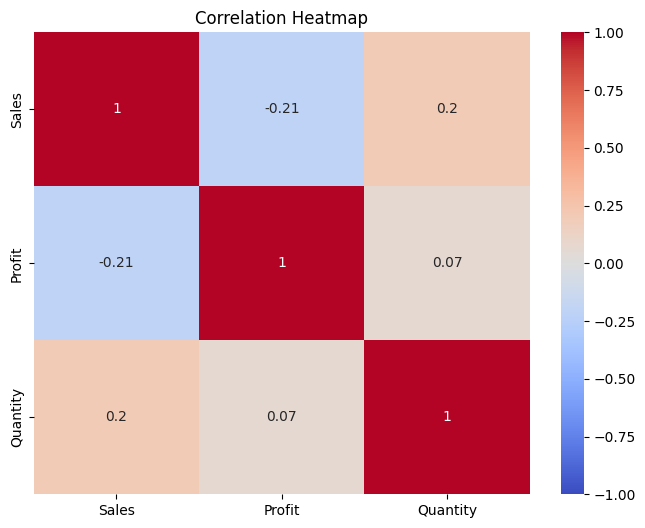

In [9]:
# Correlation matrix
corr_matrix = df[['Sales', 'Profit', 'Quantity']].corr()
print('Correlation Matrix:')
print(corr_matrix)

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [10]:
# Pivot table
pivot_table = pd.pivot_table(df, values=['Sales', 'Profit'], index='Region', columns='Category', aggfunc='mean')
print('Pivot Table (Mean Sales and Profit by Region and Category):')
print(pivot_table)

Pivot Table (Mean Sales and Profit by Region and Category):
             Profit                                  Sales                  \
Category  Furniture Office Supplies Technology   Furniture Office Supplies   
Region                                                                       
Central  -32.626883       -7.867887  46.070095  383.155434       89.297884   
East      10.193749       20.602393  70.436959  171.738909       90.608730   
South    -16.788111       15.422756 -90.190046  626.926500       75.744623   
West       9.099498       31.510578  86.904092  383.526830      112.283080   

                       
Category   Technology  
Region                 
Central    431.621053  
East       547.338784  
South     1297.225000  
West       522.460698  
